# ODEV 6

### Ön Çalışmalar

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgnl
from scipy.fftpack import fft, ifft

%matplotlib notebook

import SystemFunction

<IPython.core.display.Javascript object>


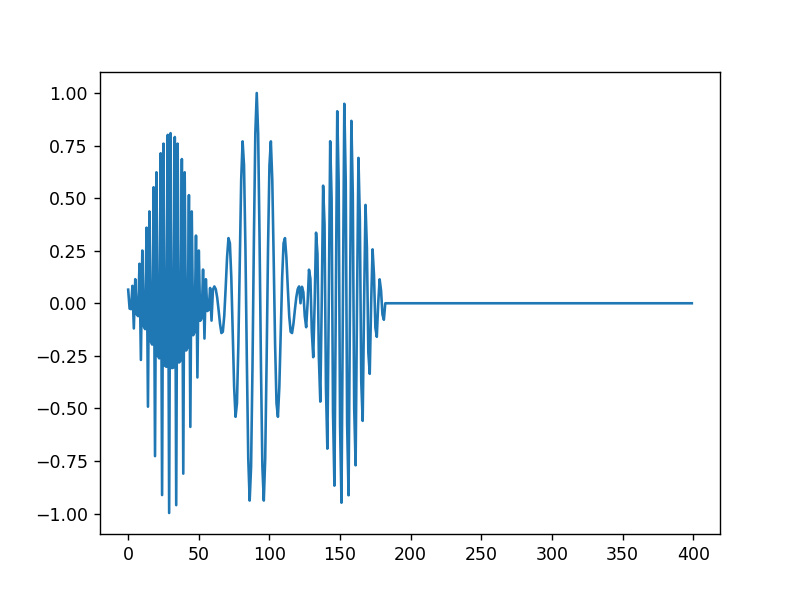

In [96]:
N= 400
M = 60

n = np.arange(0, M+1, 1)
wn = 0.54 - 0.46*np.cos(2*np.pi*n/M)

x1 = wn*np.cos(0.2*np.pi*n)
x2 = wn*np.cos(0.4*np.pi*n - np.pi/2)
x3 = wn*np.cos(0.8*np.pi*n - np.pi/5)

xn = np.concatenate((x3, x1, x2, np.zeros(N-3*len(n))), axis=None)

plt.figure()
plt.plot(xn)

<IPython.core.display.Javascript object>


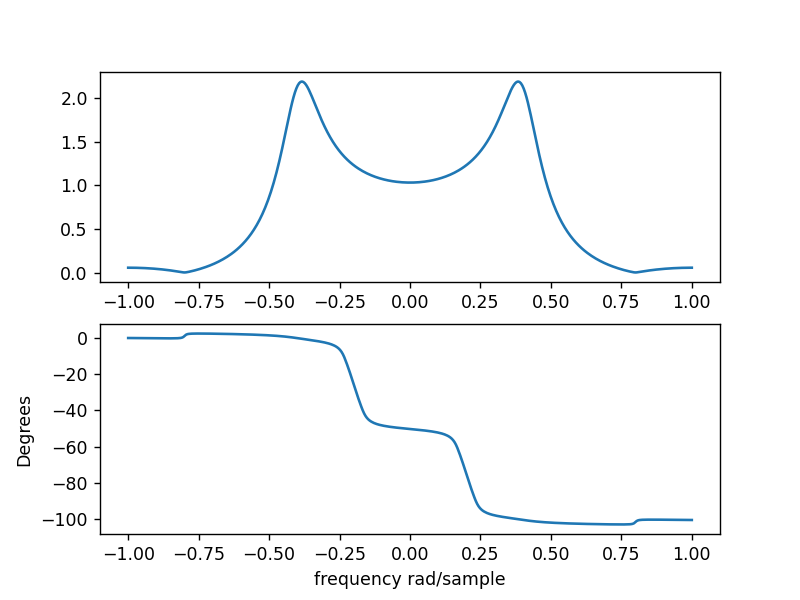

Text(0.5, 0, 'frequency rad/sample')

In [97]:
w = np.linspace(-np.pi, np.pi, N)
Xw = fft(xn)
Xw_shifted = np.fft.fftshift(Xw)

Hw, polezz, zerozz, K = SystemFunction.SystemFunction(w)

Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax2.plot(w/np.pi, Hw_phs)
plt.ylabel("Degrees")
plt.xlabel("frequency rad/sample")

<IPython.core.display.Javascript object>


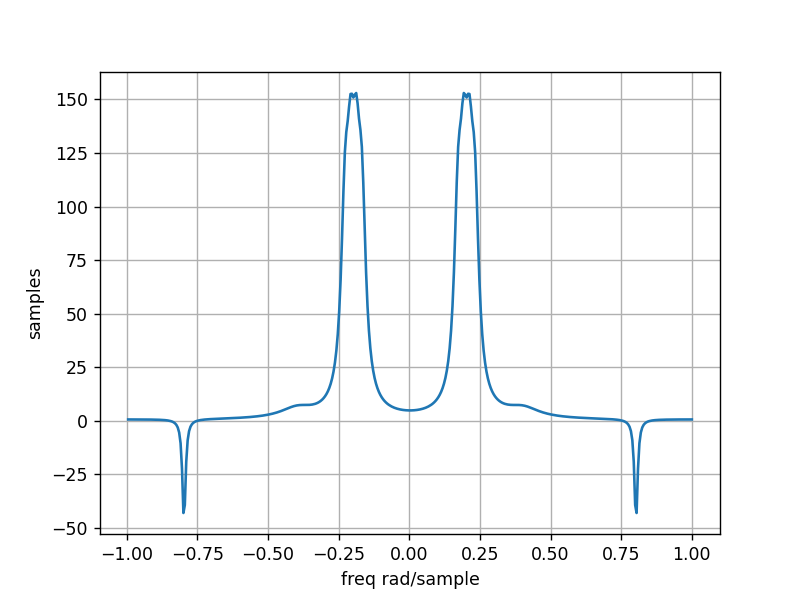

In [98]:
tau_W = -np.diff(Hw_phs)*(N/(2*np.pi))
plt.figure()
plt.plot(w[1::]/np.pi, tau_W)
plt.ylabel("samples")
plt.xlabel("freq rad/sample")
plt.grid()

<IPython.core.display.Javascript object>


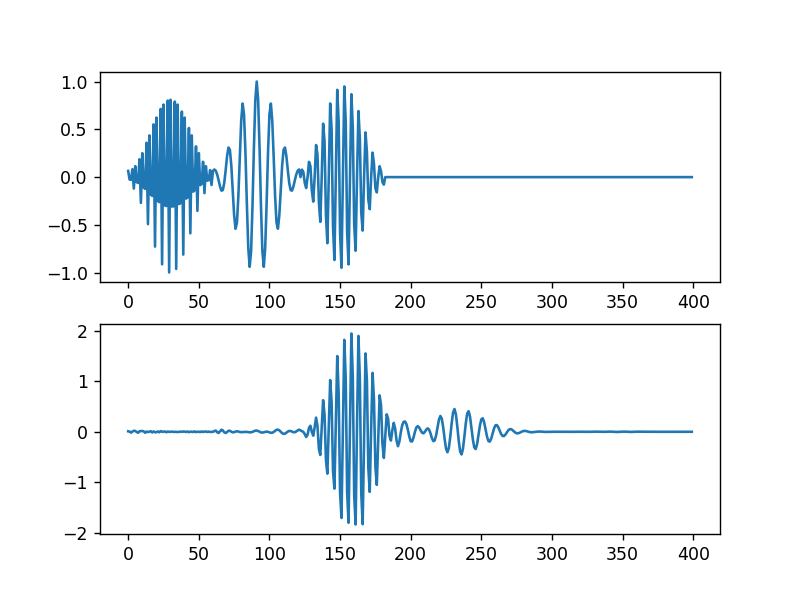

In [99]:
Yw_shifted = Hw * Xw_shifted

Yw = np.fft.ifftshift(Yw_shifted)
yn = np.real(ifft(Yw))

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(xn)
ax2.plot(yn)

### Ornek-3

<IPython.core.display.Javascript object>


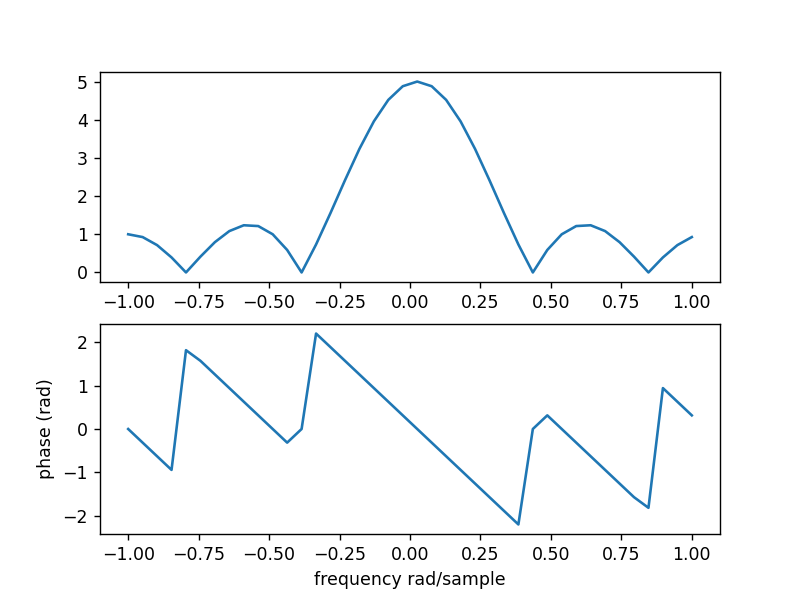

Text(0.5, 0, 'frequency rad/sample')

In [100]:
N = 40
hn = np.ones(5)
Hw = np.fft.fftshift(fft(hn, N))

w = np.linspace(-np.pi, np.pi, N)

Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax2.plot(w/np.pi, Hw_phs)
plt.ylabel('phase (rad)')
plt.xlabel('frequency rad/sample')

<IPython.core.display.Javascript object>


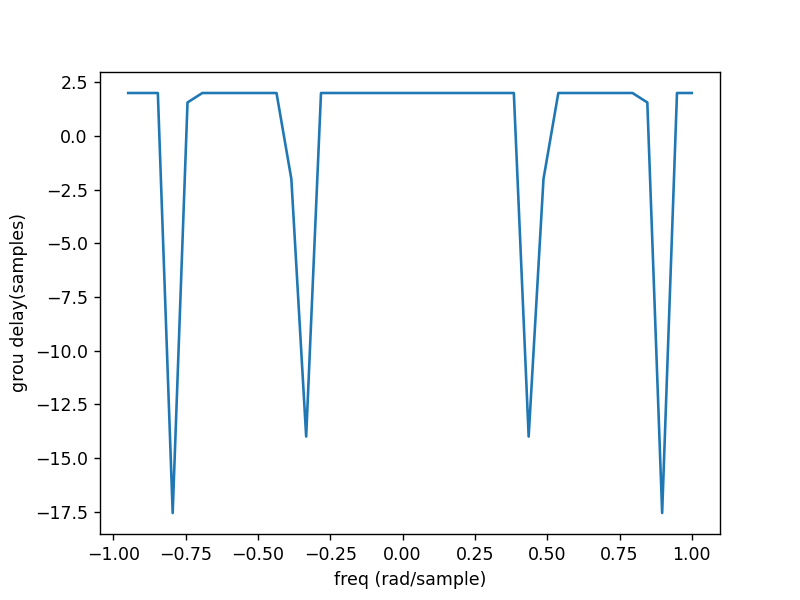

Text(0, 0.5, 'grou delay(samples)')

In [101]:
tau_w = -np.diff(Hw_phs)*(N/(2*np.pi))

plt.figure()
plt.plot(w[1::]/np.pi, tau_w)
plt.xlabel("freq (rad/sample)")
plt.ylabel("grou delay(samples)")

<IPython.core.display.Javascript object>


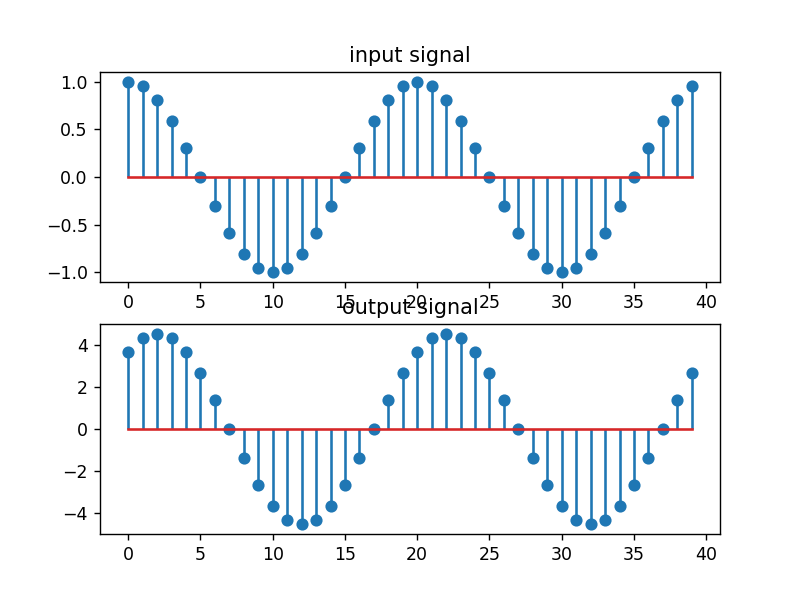

(<StemContainer object of 3 artists>, None)

In [102]:
n = np.arange(0, N, 1)
w0 = 0.1 * np.pi
xn = np.cos(w0*n)

Xw = np.fft.fftshift(fft(xn,N))

Yw_shifted = Hw * Xw
Yw = np.fft.ifftshift(Yw_shifted)
yn = np.real(ifft(Yw))

fig, (ax1, ax2) = plt.subplots(2)
ax1.stem(n, xn), ax1.title.set_text("input signal")
ax2.stem(n, yn), ax2.title.set_text("output signal")

#### Ornek4

In [110]:
from scipy.io import loadmat

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Wed May 27 16:14:07 2020', '__version__': '1.0', '__globals__': [], 'ba': array([['0.0004994540782331004 ', '1.0                   '],
       ['0.004994540782331004  ', '-1.9924014816014122   '],
       ['0.02247543352048952   ', '3.0194828633553836    '],
       ['0.05993448938797205   ', '-2.818522426494513    '],
       ['0.10488535642895108   ', '2.038720637062524     '],
       ['0.12586242771474132   ', '-1.0545446210956786   '],
       ['0.1048853564289511    ', '0.4144462687503984    '],
       ['0.05993448938797205   ', '-0.11571862523682806  '],
       ['0.02247543352048952   ', '0.022498509272218248  '],
       ['0.004994540782331004  ', '-0.0026689123535760966'],
       ['0.0004994540782331004 ', '0.00014876445217776194']], dtype='<U22')}
[[ 4.99454078e-04  1.00000000e+00]
 [ 4.99454078e-03 -1.99240148e+00]
 [ 2.24754335e-02  3.01948286e+00]
 [ 5.99344894e-02 -2.81852243e+00]
 [ 1.04885356e-01  2.03872064e+00]
 

C:\Users\emircan\AppData\Local\Temp\ipykernel_19728\3301324130.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Coeffs = filter_data["ba"].astype(np.float)


<IPython.core.display.Javascript object>


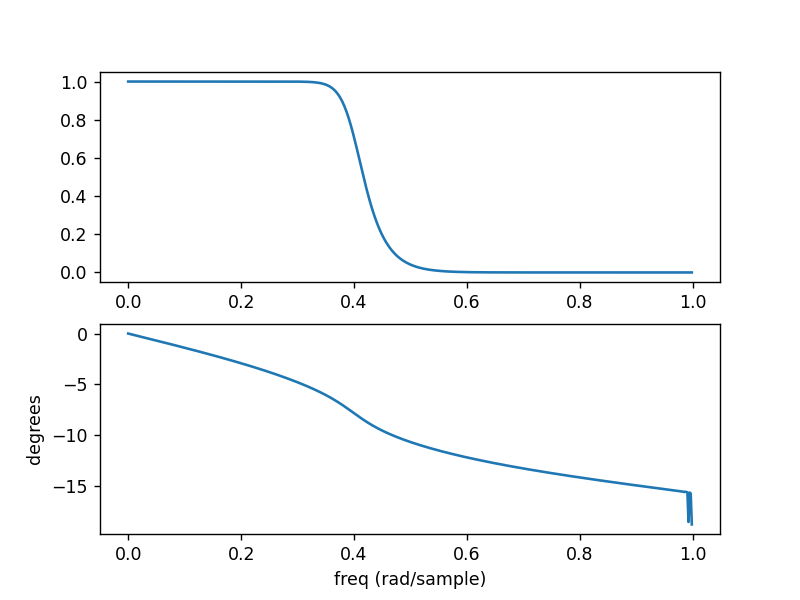

Text(0.5, 0, 'freq (rad/sample)')

In [116]:
filter_data = loadmat("butterworth.mat")
print(filter_data)

Coeffs = filter_data["ba"].astype(np.float)

b = Coeffs[:, 0]
a = Coeffs[:, 1] 

print(Coeffs)

w, Hw = sgnl.freqz(b, a)

Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax2.plot(w/np.pi, Hw_phs)

plt.ylabel("degrees")
plt.xlabel("freq (rad/sample)")

<IPython.core.display.Javascript object>


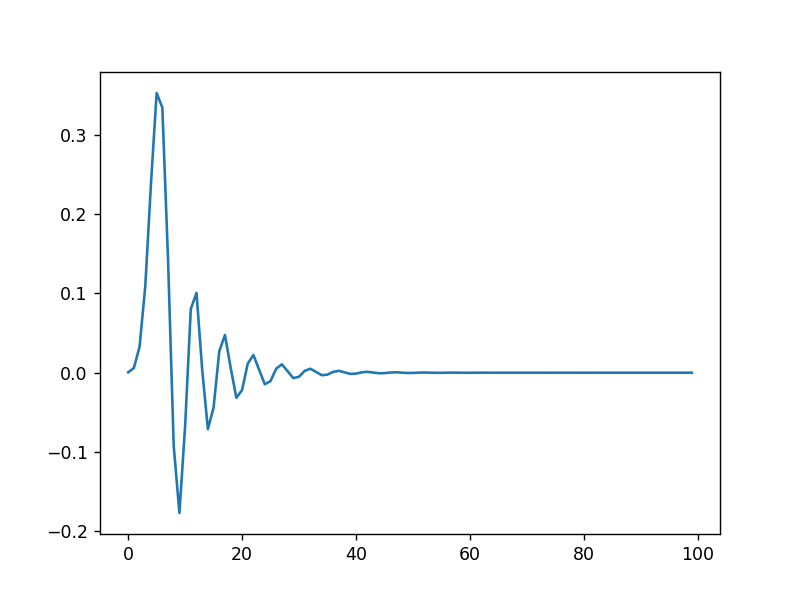

In [117]:
n, hn = sgnl.dimpulse((b,a,1), n=100)
plt.figure()
plt.plot(n, np.squeeze(hn))

<IPython.core.display.Javascript object>


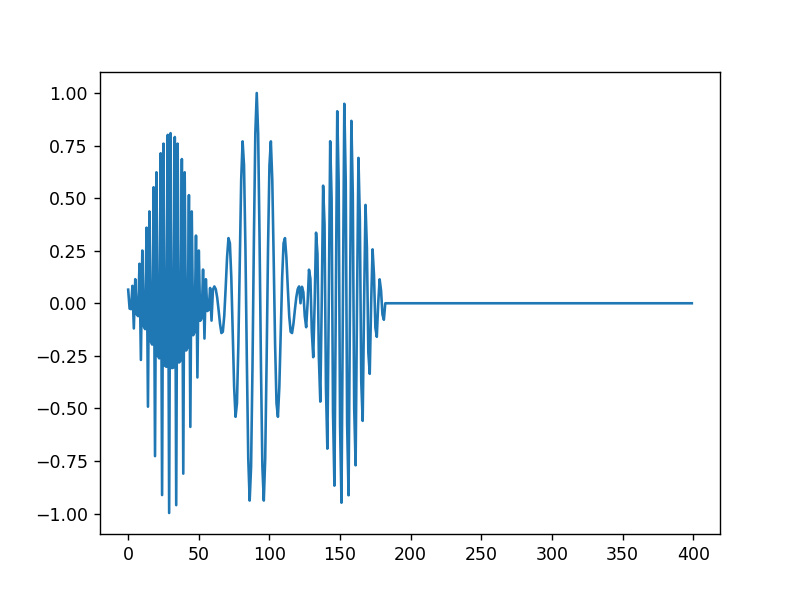

In [118]:
N = 400
M = 60

n1 = np.arange(0, M+1, 1)
wn = 0.54 - 0.46 * np.cos(2*np.pi*n1/M)

x1 = wn*np.cos(0.2*np.pi*n1)
x2 = wn*np.cos(0.4*np.pi*n1-np.pi/2)
x3 = wn*np.cos(0.8*np.pi*n1-np.pi/5)

xn = np.concatenate((x3, x1, x2, np.zeros(N-3*len(n1))), axis = None)

plt.figure()
plt.plot(xn)

<IPython.core.display.Javascript object>


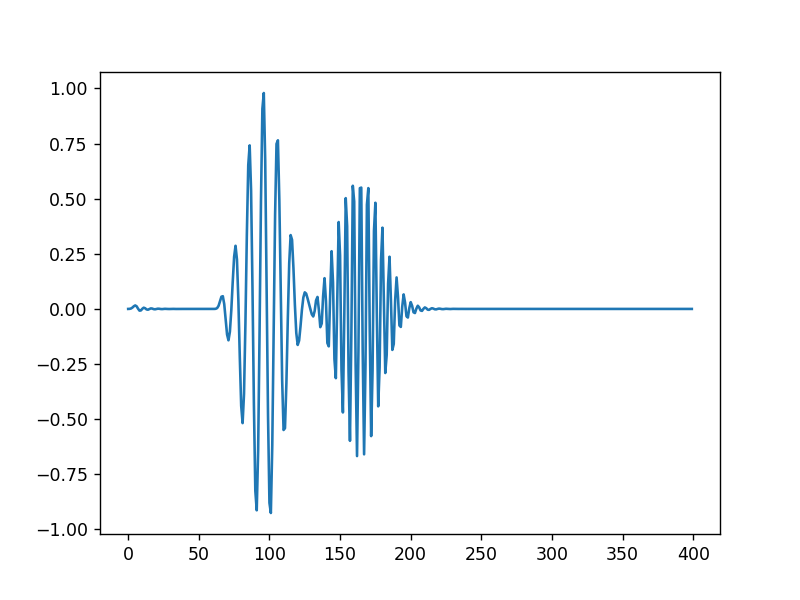

In [119]:
yn = sgnl.lfilter(b, a, xn)

plt.figure()
plt.plot(yn)

 ### ÖDEV6
 ### Soru1

C:\Users\emircan\AppData\Local\Temp\ipykernel_19728\3956940364.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Coeffs = filter_data["ba"].astype(np.float)


<IPython.core.display.Javascript object>


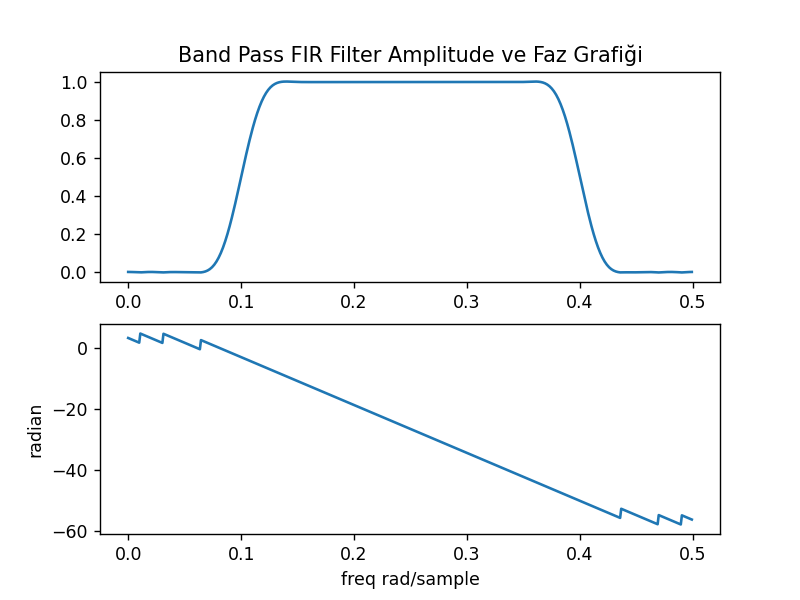

<IPython.core.display.Javascript object>


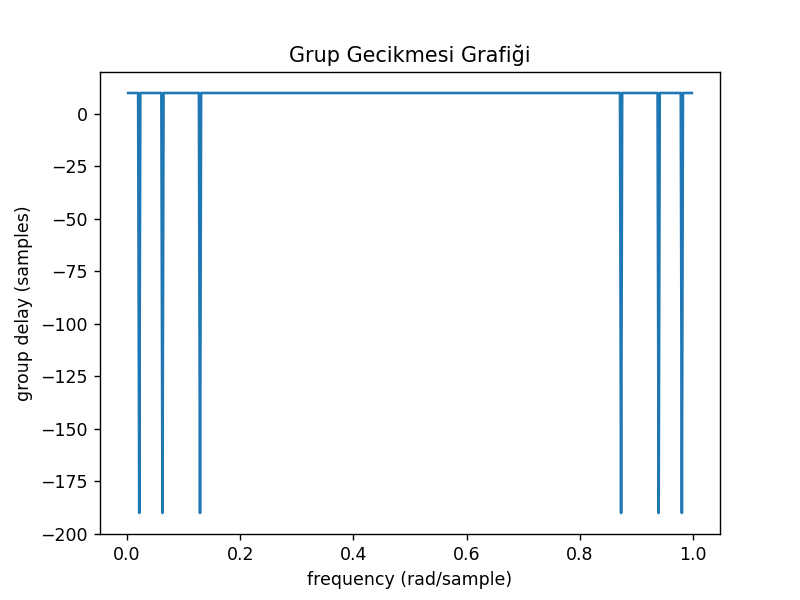

'\nyn = sgnl.lfilter(b, 1, xn)\n\nplt.figure()\nplt.plot(xn)\nplt.title("x[n]")\n\nplt.figure()\nplt.plot(yn)\nplt.title("y[n]")\n'

In [89]:
"""
Coeffs = filter_data['ba']
#print(Coeffs)
float_array = np.array([float(x[0]) for x in Coeffs[1:]])
b = float_array
#b = Coeffs[:,0] 
"""
filter_data = loadmat('emirBPF.mat') 
Coeffs = filter_data["ba"].astype(np.float)

b = Coeffs[0,:]


w, Hw = sgnl.freqz(b, 1)
Hw_mag = np.abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))
fig, (ax1, ax2) = plt.subplots(2)
ax1.title.set_text("Band Pass FIR Filter Amplitude ve Faz Grafiği")
ax1.plot(w/(2*np.pi), Hw_mag)
ax2.plot(w/(2*np.pi), Hw_phs), plt.ylabel("radian")
plt.xlabel("freq rad/sample")


plt.figure()
tau_w = -np.diff(Hw_phs) * (N/(2*np.pi))
plt.plot(w[1::]/np.pi, tau_w)
plt.xlabel("frequency (rad/sample)")
plt.ylabel("group delay (samples)")
plt.title("Grup Gecikmesi Grafiği")

"""
yn = sgnl.lfilter(b, 1, xn)

plt.figure()
plt.plot(xn)
plt.title("x[n]")

plt.figure()
plt.plot(yn)
plt.title("y[n]")
"""

C:\Users\emircan\AppData\Local\Temp\ipykernel_19728\2387923014.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Coeffs = filter_data["ba"].astype(np.float)


<IPython.core.display.Javascript object>


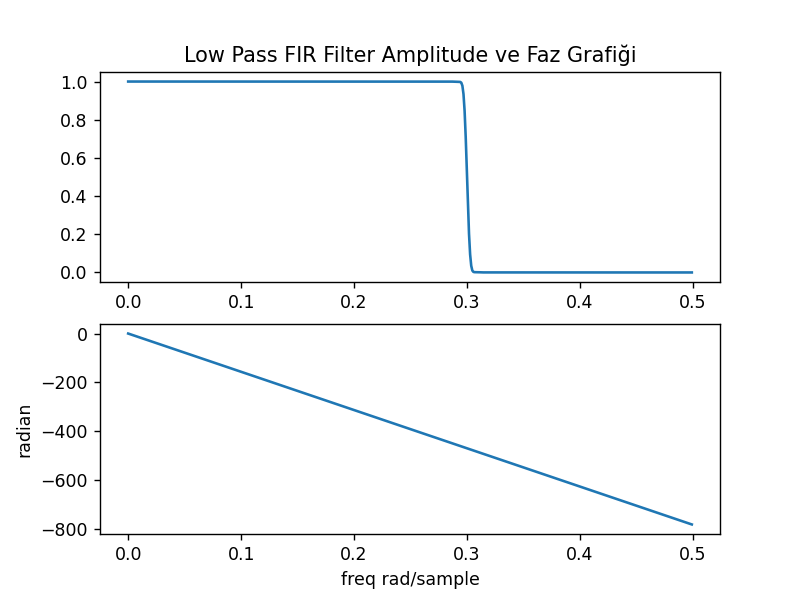

<IPython.core.display.Javascript object>


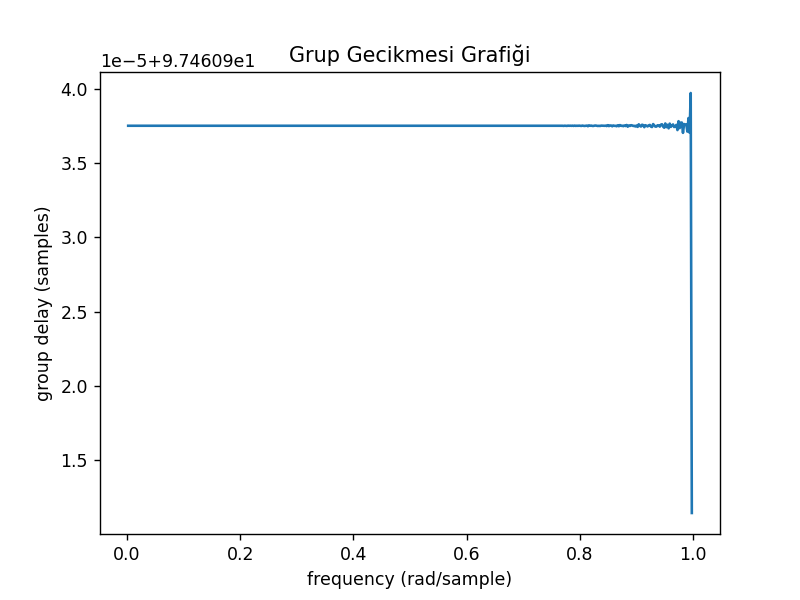

'\nyn = sgnl.lfilter(b, 1, xn)\n\nplt.figure()\nplt.plot(xn)\nplt.title("x[n]")\n\nplt.figure()\nplt.plot(yn)\nplt.title("y[n]")\n'

In [90]:
filter_data = loadmat("emirLPF2.mat")
#print(filter_data)

Coeffs = filter_data["ba"].astype(np.float)

b = Coeffs[0,:]

"""
filter_data = loadmat('lp_filter3.mat') 
Coeffs = filter_data['ba']
#print(Coeffs)
float_array = np.array([float(x[0]) for x in Coeffs[1:]])
b = float_array
#b = Coeffs[:,0] 
"""



w, Hw = sgnl.freqz(b, 1)
Hw_mag = np.abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/(2*np.pi), Hw_mag)
ax2.plot(w/(2*np.pi), Hw_phs), plt.ylabel("radian")
plt.xlabel("freq rad/sample")
ax1.title.set_text("Low Pass FIR Filter Amplitude ve Faz Grafiği")

plt.figure()
tau_w = -np.diff(Hw_phs) * (N/(2*np.pi))
plt.plot(w[1::]/np.pi, tau_w)
plt.xlabel("frequency (rad/sample)")
plt.ylabel("group delay (samples)")
plt.title("Grup Gecikmesi Grafiği")

"""
yn = sgnl.lfilter(b, 1, xn)

plt.figure()
plt.plot(xn)
plt.title("x[n]")

plt.figure()
plt.plot(yn)
plt.title("y[n]")
"""

### Soru 1 Yorum

#### Genlik Cevabı: Alçak geçiren filtrede görüldüğü gibi belirli bir kesim frekansından sonra genlik 0 a yaklaşır. Bant geçiren filtrede ise belirlenen bant genişliği içinde genlik maksimum iken dışında genlik düşer.
#### Faz Cevabı: İkisi de lineer faz cevabına sahiptir.
#### Grup Gecikmesi: Alçak geçiren filtrenin grup gecikmesine baktığımızda, sinyalin çıkış sinyalinin sağa ötelendiğini gösterir. Bant geçiren filtrede ise küçük bir öteleme(gecikme) görülür.

## Soru 2

C:\Users\emircan\AppData\Local\Temp\ipykernel_19728\850358076.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Coeffs = filter_data["ba"].astype(np.float)


<IPython.core.display.Javascript object>


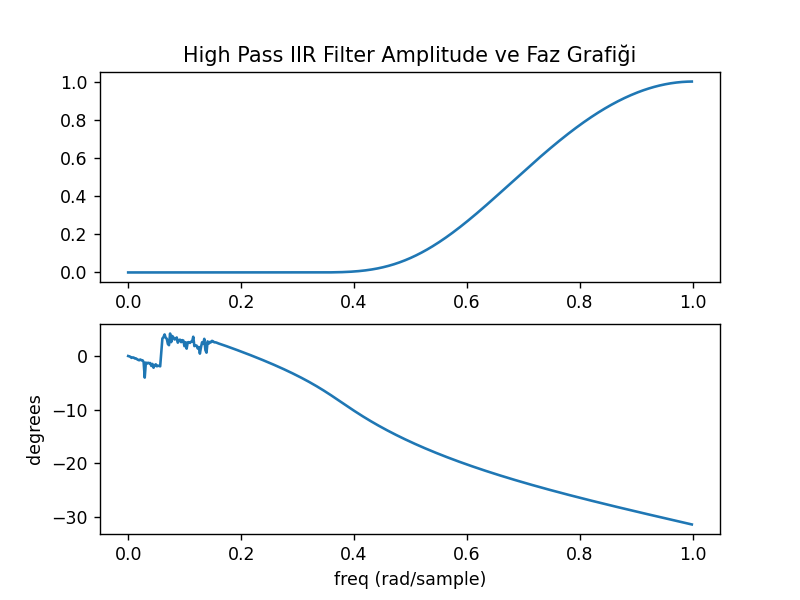

<IPython.core.display.Javascript object>


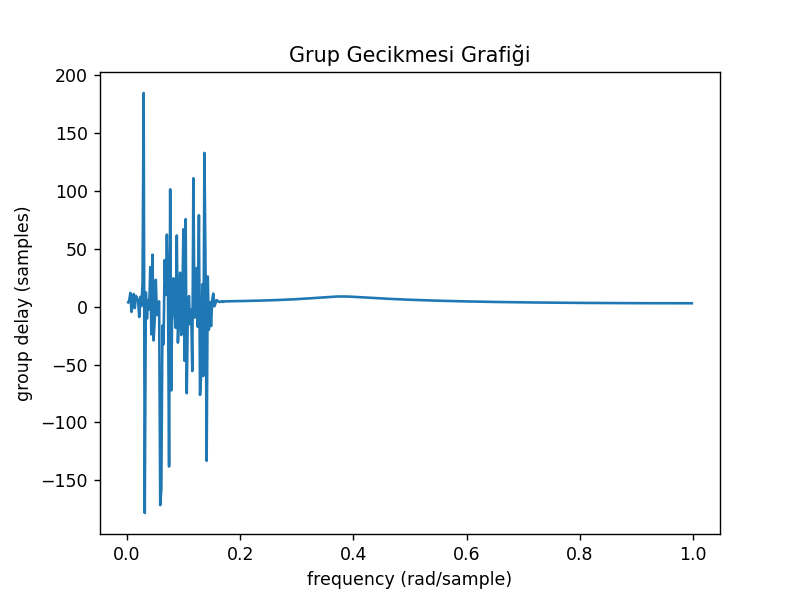

Text(0.5, 1.0, 'Grup Gecikmesi Grafiği')

In [92]:
filter_data = loadmat("emirHPF2.mat")
#print(filter_data)

Coeffs = filter_data["ba"].astype(np.float)

b = Coeffs[0,:]
a = Coeffs[1, :]

#print(Coeffs)
#print(b)
#print(a)

w, Hw = sgnl.freqz(b, a)

Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax2.plot(w/np.pi, Hw_phs)

plt.ylabel("degrees")
plt.xlabel("freq (rad/sample)")
ax1.title.set_text("High Pass IIR Filter Amplitude ve Faz Grafiği")

plt.figure()
tau_w = -np.diff(Hw_phs) * (N/(2*np.pi))
plt.plot(w[1::]/np.pi, tau_w)
plt.xlabel("frequency (rad/sample)")
plt.ylabel("group delay (samples)")
plt.title("Grup Gecikmesi Grafiği")

C:\Users\emircan\AppData\Local\Temp\ipykernel_19728\1023875313.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Coeffs = filter_data["ba"].astype(np.float)


<IPython.core.display.Javascript object>


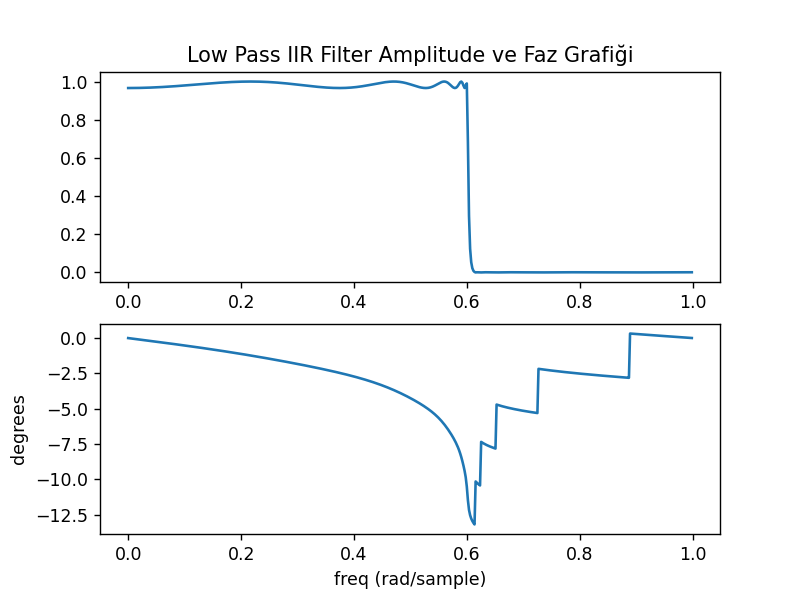

<IPython.core.display.Javascript object>


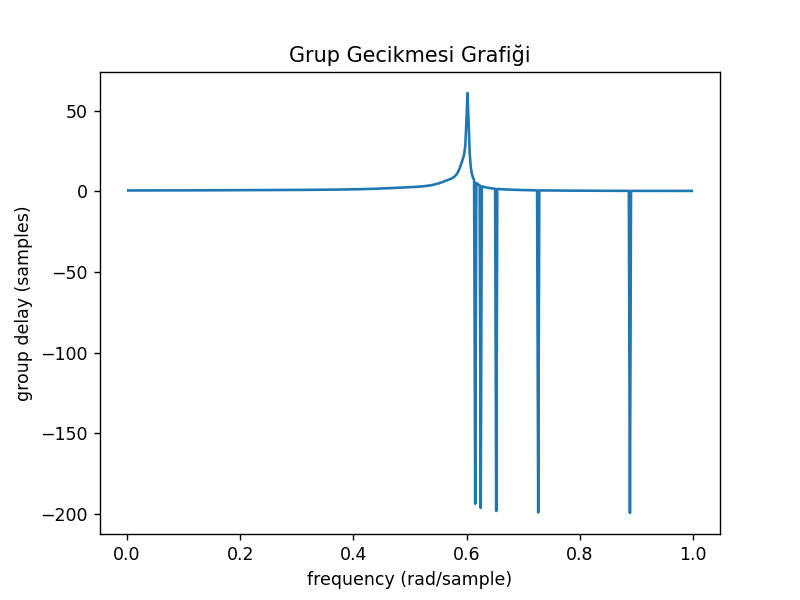

Text(0.5, 1.0, 'Grup Gecikmesi Grafiği')

In [93]:
filter_data = loadmat("emirLPF3.mat")
#print(filter_data)

Coeffs = filter_data["ba"].astype(np.float)

b = Coeffs[0,:]
a = Coeffs[1, :]

#print(Coeffs)
#print(b)
#print(a)

w, Hw = sgnl.freqz(b, a)

Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax2.plot(w/np.pi, Hw_phs)

plt.ylabel("degrees")
plt.xlabel("freq (rad/sample)")
ax1.title.set_text("Low Pass IIR Filter Amplitude ve Faz Grafiği")

plt.figure()
tau_w = -np.diff(Hw_phs) * (N/(2*np.pi))
plt.plot(w[1::]/np.pi, tau_w)
plt.xlabel("frequency (rad/sample)")
plt.ylabel("group delay (samples)")
plt.title("Grup Gecikmesi Grafiği")

### Soru 2 Yorum

#### Genlik Cevabı: Alçak geçiren filtrede görüldüğü gibi belirli bir kesim frekansından sonra genlik 0 a yaklaşır. Yüksek Geçiren filtrede ise belirlenen kesim frekansının altında genlik düşmekte ve kesim frekansından sonra genlik artmaktadır.
#### Faz Cevabı: Grafiklerde görüldüğü gibi iki faz cevabı da lineer değildir. Bu durum sinyalin şeklinin bozulmasına sebep olabilir.
#### Grup Gecikmesi:Grup gecikmesi grafikleri ise bu faz cevabına nazaran ayrı bir kaos.